## Question 4 zs389

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go

In [15]:
weather_df = pd.read_csv('weather - 286_40.75_t2m_1d.csv')
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       26298 non-null  object 
 1   longitude  26298 non-null  int64  
 2   latitude   26298 non-null  float64
 3   Ktemp      26298 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 821.9+ KB


In [16]:
weather_df['date_time'] = pd.to_datetime(weather_df['time'])
weather_df['time'] = pd.to_datetime(weather_df['time'])
weather_df['Ftemp'] = weather_df['Ktemp'].apply(lambda x: (x - 273.15) * (9/5) + 32)
weather_df.set_index('time', inplace=True)

In [17]:
all_years_data = {}
for year in range(weather_df.index.year.min(), weather_df.index.year.max() + 1):
    year_df = weather_df[weather_df.index.year == year]
    month_avg_temp = year_df['Ftemp'].resample('M').mean()
    all_years_data[year] = month_avg_temp

fig = go.Figure()

initial_year = weather_df.index.year.min()
initial_data = all_years_data[initial_year]

fig.add_trace(go.Scatter(x=initial_data.index.month, y=initial_data.values, mode='lines+markers', name='Average Month Temp'))

sliders = [{
    'steps': [],
    'currentvalue': {'prefix': 'Year To View: '},
    'pad': {'t': 50}
}]

for year, data in all_years_data.items():
    step = {
        'method': 'update',
        'args': [{'x': [data.index.month], 'y': [data.values]}],
        'label': str(year)
    }
    sliders[0]['steps'].append(step)

fig.update_layout(
    sliders=sliders,
    title='Average Temperature Monthly',
    xaxis=dict(title='Month', tickmode='array', tickvals=list(range(1, 13))),
    yaxis=dict(title='Ftemp'),
    template='plotly_white'
)

fig.show()

fig.write_html("avg_temp_year.html")

### To View this interactive please go to this colab file and run all.
### Link: https://garethsun11.github.io/homework_question4/avg_temp_year.html

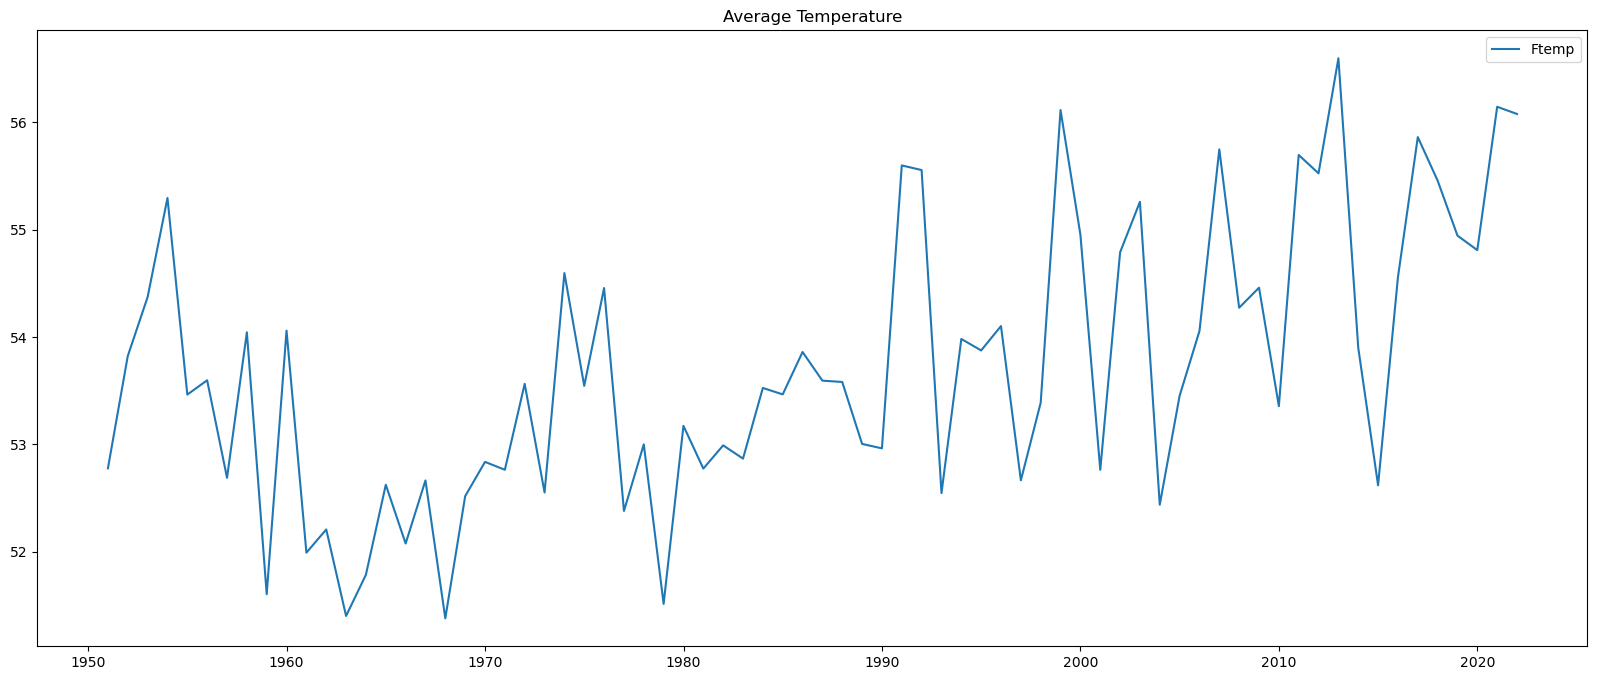

1953-12-31 00:00:00 55.29520794520552


In [18]:
year_average = weather_df['Ftemp'].resample('Y').mean()

plt.figure(figsize=(20, 8))
plt.title('Average Temperature')
plt.plot(year_average.index, year_average.values, label = 'Ftemp')
plt.legend()
plt.show()


for time, temp in year_average.items():
    if temp > 55:
        print(time, temp)
        break

B) The first year's average temperature over 55 is 1953.

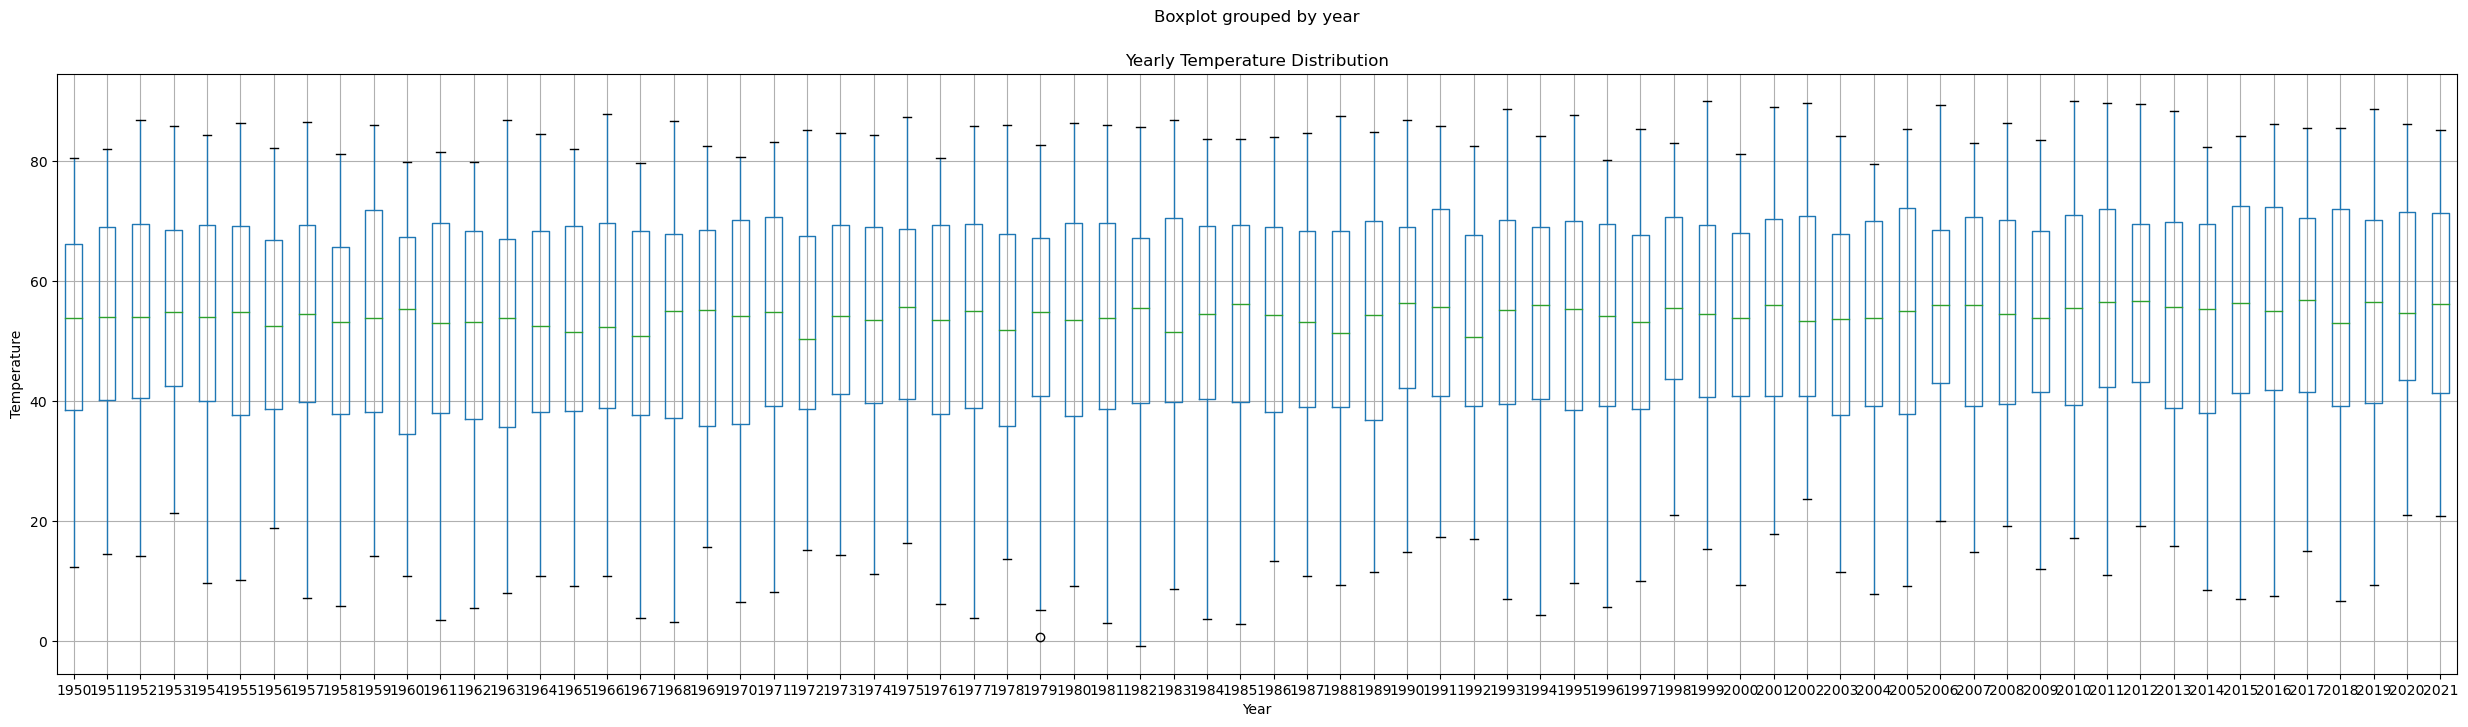

In [19]:
weather_df['year'] = weather_df.index.year


weather_df.boxplot(column='Ftemp', by = 'year', figsize=(30,8))

plt.title('Yearly Temperature Distribution')
plt.xlabel('Year')
plt.ylabel('Temperature')

plt.show()


In [20]:
weather_1979 = weather_df[weather_df['year'] == 1979]
outlier_record = weather_1979[weather_1979['Ftemp'] == weather_1979['Ftemp'].min()]
outlier_time = outlier_record.index
print("Extreme Point occurred at:", outlier_time.values)

Extreme Point occurred at: ['1979-02-18T09:00:00.000000000']


In this box plot, I tried to detect the outliers of temperature for each year to detect some extreme temperature. 

Based on the graph, I noticed there is one outlier during these records. This event occurred at 1979-02-18. During that day, the temperature reached 0.7577 Fahrenheit Degree.


In [21]:
def season(inputs):
    month = inputs.month
    if 3<= month <= 5:
        return 'Spring' 
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

weather_df['season'] = weather_df['date_time'].apply(season)


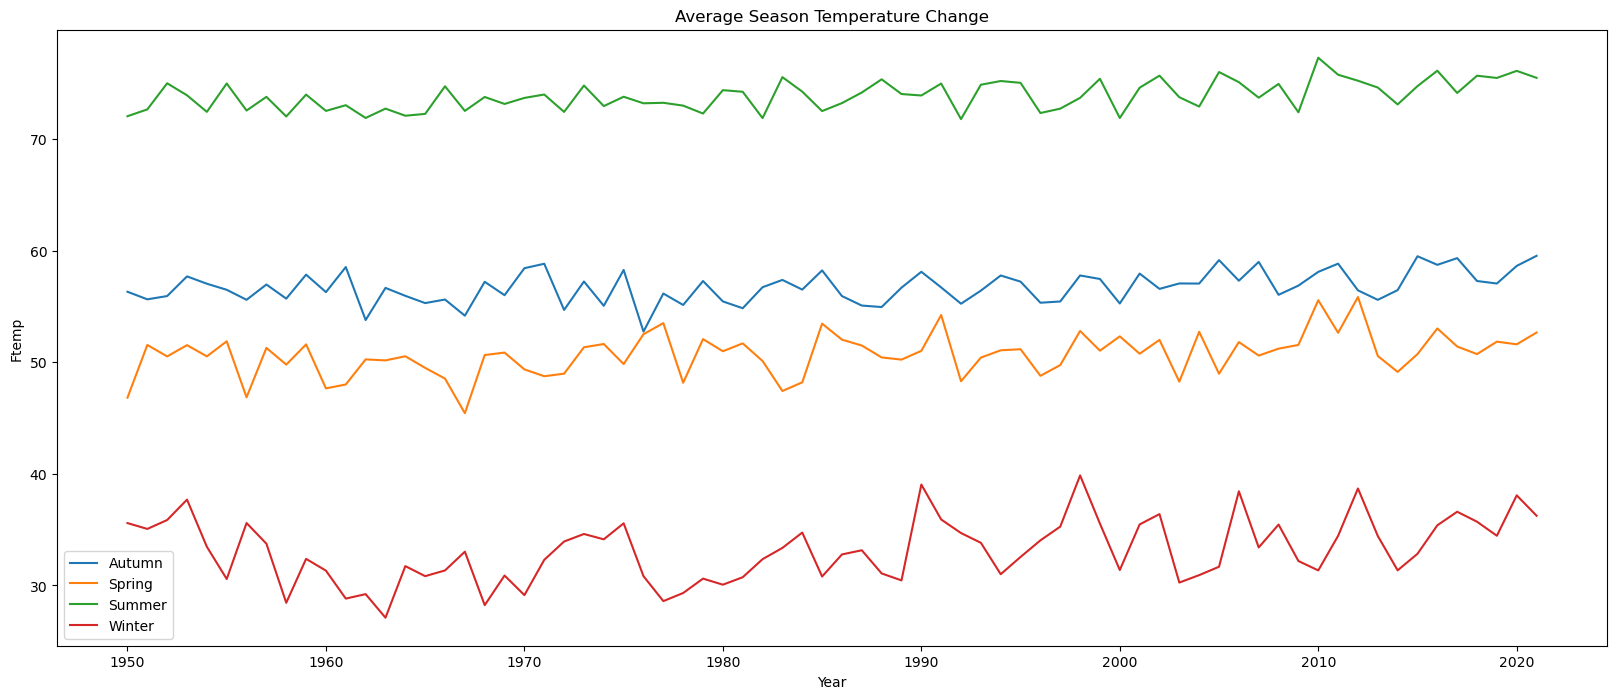

In [22]:
season_avg = weather_df.groupby(['year', 'season'])['Ftemp'].mean().unstack()


plt.figure(figsize=(20, 8))

for season in season_avg.columns:
    plt.plot(season_avg.index, season_avg[season], label = season)

plt.title('Average Season Temperature Change')
plt.xlabel('Year')
plt.ylabel('Ftemp')
plt.legend(season_avg.columns)
plt.show()


From this graph, we observed the annual change in average temperatures for each season.

We can tell that winter temperatures are the most unstable, exhibiting significant fluctuations. And the temperature is relativly stable. 